In [1]:
#1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import japanize_matplotlib
%matplotlib inline
from pprint import pprint

df = pd.read_excel('SSDSE-E-2023.xlsx', header=[0, 2], index_col=[0,1])
df.index.names=['地域コード','都道府県']
df.columns.names=['項目コード','項目名']
df.head()

,項目コード,A1101,A1102,A1301,A1302,A1303,A1700,A4101,A4103,A4200,A5101,...,I5103,I6100,I6200,I6300,J2503,J2506,L3221,L322101,L322102,L322109
,項目名,総人口,日本人人口,15歳未満人口,15～64歳人口,65歳以上人口,外国人人口,出生数,合計特殊出生率,死亡数,転入者数（日本人移動者）,...,歯科診療所数,医師数,歯科医師数,薬剤師数,保育所等数,保育所等在所児数,消費支出（二人以上の世帯）,食料費（二人以上の世帯）,住居費（二人以上の世帯）,教養娯楽費（二人以上の世帯）
地域コード,都道府県,,,,,,,,,,,,,,,,,,,,,
R00000,全国,125502000,122780000,14784000,74504000,36214000,2402460,840835,1.36,1372755,2242845,...,67874,339623,107443,321982,29474,2624335,279024,75761,18329,24545
R01000,北海道,5183000,5147000,544000,2953000,1686000,34321,29523,1.24,65078,48832,...,2840,13731,4418,11802,1045,79404,268396,71448,22013,23762
R02000,青森県,1221000,1216000,127000,676000,419000,5409,6837,1.38,17905,16169,...,511,2773,735,2345,475,30723,245117,69503,13232,19092
R03000,岩手県,1196000,1189000,129000,659000,409000,6937,6718,1.35,17204,16149,...,566,2700,1016,2536,390,28895,272911,73738,17181,22302
R04000,宮城県,2290000,2269000,264000,1371000,655000,19453,14480,1.23,24632,44079,...,1052,5950,1896,5502,492,39497,284171,75689,19852,24985


In [2]:
#2
def pref_listβ(*keys, data=df):
    '''
    (args)
            *keys   : 抽出対象の任意の数の地域コードを指定
            data=df : DataFram(dfがデフォルト値)
    (usage)
            >>>pprint(pref_listβ('R13000', 'R14000', 'R15000', 'R16000', 'R17000', 'R18000'))
            [('R13000', '東京都'),
             ('R14000', '神奈川県'),
             ('R15000', '新潟県'),
             ('R16000', '富山県'),
             ('R17000', '石川県'),
             ('R18000', '福井県')]
    '''
    prefs = []
    for key in keys:
        prefs += [i for i in data.index if i[0] == key]
    return prefs

pprint(pref_listβ('R13000', 'R14000', 'R15000', 'R16000', 'R17000', 'R18000'))

[('R13000', '東京都'),
 ('R14000', '神奈川県'),
 ('R15000', '新潟県'),
 ('R16000', '富山県'),
 ('R17000', '石川県'),
 ('R18000', '福井県')]


In [3]:
#3
def item_list(*keys, data=df):
    '''
    (args)
            *keys   : 抽出対象の任意の数の項目コードを指定
            data=df : DataFram(dfがデフォルト値)
    (usage)
            >>>pprint(item_list('A13', 'E'))
            [('A1301', '15歳未満人口'),
             ('A1302', '15～64歳人口'),
             ('A1303', '65歳以上人口'),
             ('E1101', '幼稚園数'),
             ('E1501', '幼稚園在園者数'),
             ('E2101', '小学校数'),
             ('E2501', '小学校児童数'),
             ('E3101', '中学校数'),
             ('E3501', '中学校生徒数'),
             ('E4101', '高等学校数'),
             ('E4501', '高等学校生徒数'),
             ('E6101', '短期大学数'),
             ('E6102', '大学数'),
             ('E6301', '短期大学学生数'),
             ('E6302', '大学学生数')]
    '''
    items = []
    for key in keys:
        items += [i for i in data.columns if i[0][0:len(key)] == key]
    return items

pprint(item_list('A13', 'E'))
    

[('A1301', '15歳未満人口'),
 ('A1302', '15～64歳人口'),
 ('A1303', '65歳以上人口'),
 ('E1101', '幼稚園数'),
 ('E1501', '幼稚園在園者数'),
 ('E2101', '小学校数'),
 ('E2501', '小学校児童数'),
 ('E3101', '中学校数'),
 ('E3501', '中学校生徒数'),
 ('E4101', '高等学校数'),
 ('E4501', '高等学校生徒数'),
 ('E6101', '短期大学数'),
 ('E6102', '大学数'),
 ('E6301', '短期大学学生数'),
 ('E6302', '大学学生数')]


In [4]:
#4
def pref_sliceβ(start, stop, step=1, data=df):
    '''
    (args)
            start   : スライスの開始地域コード
            stop    : スライスの終了地域コード
            step=1  : スライスの間隔(1がデフォルト値)
            data=df : DataFrame(dfがデフォルト値)
    (usage) >>>pprint(pref_sliceβ('R13000', 'R23000'))
            [('R13000', '東京都'),
             ('R14000', '神奈川県'),
             ('R15000', '新潟県'),
             ('R16000', '富山県'),
             ('R17000', '石川県'),
             ('R18000', '福井県'),
             ('R19000', '山梨県'),
             ('R20000', '長野県'),
             ('R21000', '岐阜県'),
             ('R22000', '静岡県'),
             ('R23000', '愛知県')]
    '''
    a, b = data.index.slice_locs(start, stop)
    prefs = data.index[a:b:step]
    return list(prefs)

pprint(pref_sliceβ('R13000', 'R23000'))

[('R13000', '東京都'),
 ('R14000', '神奈川県'),
 ('R15000', '新潟県'),
 ('R16000', '富山県'),
 ('R17000', '石川県'),
 ('R18000', '福井県'),
 ('R19000', '山梨県'),
 ('R20000', '長野県'),
 ('R21000', '岐阜県'),
 ('R22000', '静岡県'),
 ('R23000', '愛知県')]


In [5]:
#5
def item_sliceβ(start, stop, step=1, data=df):
    '''
    (args)
            start   : スライスの開始地域コード
            stop    : スライスの終了地域コード
            step=1  : スライスの間隔(1がデフォルト値)
            data=df : DataFrame(dfがデフォルト値)
    (usage) >>>pprint(item_sliceβ('E1101', 'E3501'))
            [('E1101', '幼稚園数'),
             ('E1501', '幼稚園在園者数'),
             ('E2101', '小学校数'),
             ('E2501', '小学校児童数'),
             ('E3101', '中学校数'),
             ('E3501', '中学校生徒数')]
    '''
    a, b = data.columns.slice_locs(start, stop)
    items = data.columns[a:b:step]
    return list(items)

pprint(item_sliceβ('E1101', 'E3501'))

[('E1101', '幼稚園数'),
 ('E1501', '幼稚園在園者数'),
 ('E2101', '小学校数'),
 ('E2501', '小学校児童数'),
 ('E3101', '中学校数'),
 ('E3501', '中学校生徒数')]


In [6]:
#6-1
def pref_list(*keys, data=df):
    '''
    (args)
            *keys   : 抽出対象の任意の数の地域コードを指定
            data=df : DataFram(dfがデフォルト値)
    (usage)
            >>>pprint(pref_list('R13', 'R14', 'R16', 'R17', 'R18'))
            [('R13000', '東京都'),
             ('R14000', '神奈川県'),
             ('R16000', '富山県'),
             ('R17000', '石川県'),
             ('R18000', '福井県')]
    '''
    prefs = []
    for key in keys:
        prefs += [i for i in data.index if i[0][0:len(key)] == key]
    return prefs

pprint(pref_list('R13', 'R14', 'R16', 'R17', 'R18'))


[('R13000', '東京都'),
 ('R14000', '神奈川県'),
 ('R16000', '富山県'),
 ('R17000', '石川県'),
 ('R18000', '福井県')]


In [19]:
#6-2
def pref_slice(start, stop, step=1, data=df):
    '''
    (args)
            start   : スライスの開始地域コード
            stop    : スライスの終了地域コード
            step=1  : スライスの間隔(1がデフォルト値)
            data=df : DataFrame(dfがデフォルト値)
    (usage) >>>pprint(pref_slice('R13', 'R20'))
            [('R13000', '東京都'),
             ('R14000', '神奈川県'),
             ('R15000', '新潟県'),
             ('R16000', '富山県'),
             ('R17000', '石川県'),
             ('R18000', '福井県'),
             ('R19000', '山梨県'),
             ('R20000', '長野県')]
    '''
    start = [i for i in data.index if i[0][0:len(start)] == start][0][0]
    stop = [i for i in data.index if i[0][0:len(stop)] == stop][-1][0]
    a, b = data.index.slice_locs(start, stop)
    prefs = data.index[a:b:step]
    return list(prefs)

pprint(pref_slice('R13', 'R20'))

[('R13000', '東京都'),
 ('R14000', '神奈川県'),
 ('R15000', '新潟県'),
 ('R16000', '富山県'),
 ('R17000', '石川県'),
 ('R18000', '福井県'),
 ('R19000', '山梨県'),
 ('R20000', '長野県')]


In [23]:
item_list('H6','J')

[('H6130', '小売店数'),
 ('H6131', '飲食店数'),
 ('H6132', '大型小売店数'),
 ('J2503', '保育所等数'),
 ('J2506', '保育所等在所児数')]

In [25]:
#6-3
def item_slice(start, stop, step=1, data=df):
    '''
    (args)
            start   : スライスの開始地域コード
            stop    : スライスの終了地域コード
            step=1  : スライスの間隔(1がデフォルト値)
            data=df : DataFrame(dfがデフォルト値)
    (usage) >>>pprint(item_slice('H6', 'J'))
            [('H6130', '小売店数'),
             ('H6131', '飲食店数'),
             ('H6132', '大型小売店数'),
             ('I510120', '一般病院数'),
             ('I5102', '一般診療所数'),
             ('I5103', '歯科診療所数'),
             ('I6100', '医師数'),
             ('I6200', '歯科医師数'),
             ('I6300', '薬剤師数'),
             ('J2503', '保育所等数'),
             ('J2506', '保育所等在所児数')]
    '''
    start = [i for i in data.columns if i[0][0:len(start)] == start][0][0]
    stop = [i for i in data.columns if i[0][0:len(stop)] == stop][-1][0]
    a, b = data.columns.slice_locs(start, stop)
    items = data.columns[a:b:step]
    return list(items)

pprint(item_slice('H6', 'J'))

[('H6130', '小売店数'),
 ('H6131', '飲食店数'),
 ('H6132', '大型小売店数'),
 ('I510120', '一般病院数'),
 ('I5102', '一般診療所数'),
 ('I5103', '歯科診療所数'),
 ('I6100', '医師数'),
 ('I6200', '歯科医師数'),
 ('I6300', '薬剤師数'),
 ('J2503', '保育所等数'),
 ('J2506', '保育所等在所児数')]


In [9]:
#7
def div(a, b, data=df):
    '''
    項目コードの指定のみでカラム同士の割り算を行う
    (args)    a: 分子となる項目コード
              b: 分母となる項目コード
    (usage)   >>>pprint(div('I510120', 'I6100'))
              地域コード   都道府県
              R00000  全国      0.021138
              R01000  北海道     0.034885
              R02000  青森県     0.027768
              R03000  岩手県     0.028519
              R04000  宮城県     0.018319
              ...
              R45000  宮崎県     0.041681
              R46000  鹿児島県    0.042338
              R47000  沖縄県     0.019810
              dtype: float64
    '''
    a = [i for i in data.columns if i[0] == a][0]
    b = [i for i in data.columns if i[0] == b][0]
    return data[a] / data[b]

pprint(div('I510120', 'I6100'))

地域コード   都道府県
R00000  全国      0.021138
R01000  北海道     0.034885
R02000  青森県     0.027768
R03000  岩手県     0.028519
R04000  宮城県     0.018319
R05000  秋田県     0.020458
R06000  山形県     0.020322
R07000  福島県     0.025771
R08000  茨城県     0.026208
R09000  栃木県     0.018228
R10000  群馬県     0.024287
R11000  埼玉県     0.021758
R12000  千葉県     0.019036
R13000  東京都     0.012232
R14000  神奈川県    0.013519
R15000  新潟県     0.021861
R16000  富山県     0.030720
R17000  石川県     0.022375
R18000  福井県     0.027483
R19000  山梨県     0.024750
R20000  長野県     0.021277
R21000  岐阜県     0.018559
R22000  静岡県     0.016927
R23000  愛知県     0.015917
R24000  三重県     0.018846
R25000  滋賀県     0.014302
R26000  京都府     0.016601
R27000  大阪府     0.017896
R28000  兵庫県     0.020749
R29000  奈良県     0.018635
R30000  和歌山県    0.025502
R31000  鳥取県     0.020844
R32000  島根県     0.018027
R33000  岡山県     0.023052
R34000  広島県     0.026393
R35000  山口県     0.030961
R36000  徳島県     0.035840
R37000  香川県     0.026681
R38000  愛媛県     0.031453
R39000  高知県 

In [10]:
#8
ps = pref_slice
il = item_list

df01 = df.loc[(ps('R26000', 'R30000'), il('E1', 'E2', 'E3'))]

df01[('E1999', f'{il("E1501", data=df01)[0][1]}/{il("E1101", data=df01)[0][1]}')] = div('E1501','E1101')
df01[('E2999' ,f'{il("E2501", data=df01)[0][1]}/{il("E2101", data=df01)[0][1]}')] = div('E2501','E2101')
df01[('E3999', f'{il("E3501", data=df01)[0][1]}/{il("E3101", data=df01)[0][1]}')] = div('E3501','E3101')

df02 = df01.loc[ps('R26000', 'R30000', data=df01), il('E1501','E2501','E3501', data=df01)]
df03 = df01.loc[ps('R26000', 'R30000', data=df01), il('E1999','E2999','E3999', data=df01)]

display(df01)
display(df02)
display(df03)



,項目コード,E1101,E1501,E2101,E2501,E3101,E3501,E1999,E2999,E3999
,項目名,幼稚園数,幼稚園在園者数,小学校数,小学校児童数,中学校数,中学校生徒数,幼稚園在園者数/幼稚園数,小学校児童数/小学校数,中学校生徒数/中学校数
地域コード,都道府県,,,,,,,,,
R26000,京都府,196,20929,368,119892,189,65187,106.780612,325.793478,344.904762
R27000,大阪府,550,73822,994,422433,517,221610,134.221818,424.982897,428.646035
R28000,兵庫県,461,42264,747,278500,380,143075,91.678959,372.824632,376.513158
R29000,奈良県,153,10501,196,65989,109,35964,68.633987,336.678571,329.944954
R30000,和歌山県,68,4370,247,43676,128,23677,64.264706,176.825911,184.976562


,項目コード,E1501,E2501,E3501
,項目名,幼稚園在園者数,小学校児童数,中学校生徒数
地域コード,都道府県,,,
R26000,京都府,20929,119892,65187
R27000,大阪府,73822,422433,221610
R28000,兵庫県,42264,278500,143075
R29000,奈良県,10501,65989,35964
R30000,和歌山県,4370,43676,23677


,項目コード,E1999,E2999,E3999
,項目名,幼稚園在園者数/幼稚園数,小学校児童数/小学校数,中学校生徒数/中学校数
地域コード,都道府県,,,
R26000,京都府,106.780612,325.793478,344.904762
R27000,大阪府,134.221818,424.982897,428.646035
R28000,兵庫県,91.678959,372.824632,376.513158
R29000,奈良県,68.633987,336.678571,329.944954
R30000,和歌山県,64.264706,176.825911,184.976562


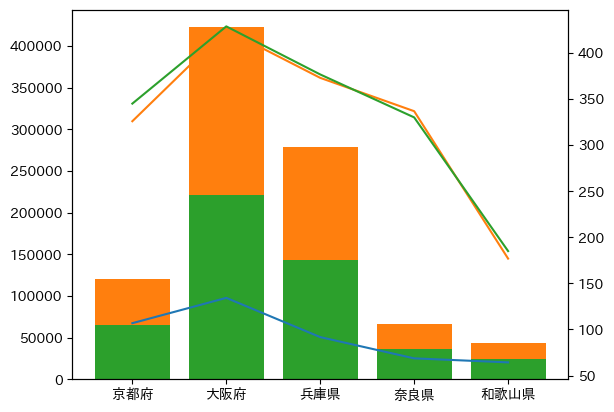

In [11]:
#9
fig, ax = plt.subplots()
idx = df02.index.get_level_values(1)
cols2 = df02.columns
bars = []
for c in cols2:
    bars += ax.bar(idx, df02.loc[df02.index, c])

axt = ax.twinx()
cols3 = df03.columns
lines = []
for c in cols3:
    lines += axt.plot(idx, df03.loc[df03.index, c], label=c[1])

print(ax.xaxis.get_major_locator())

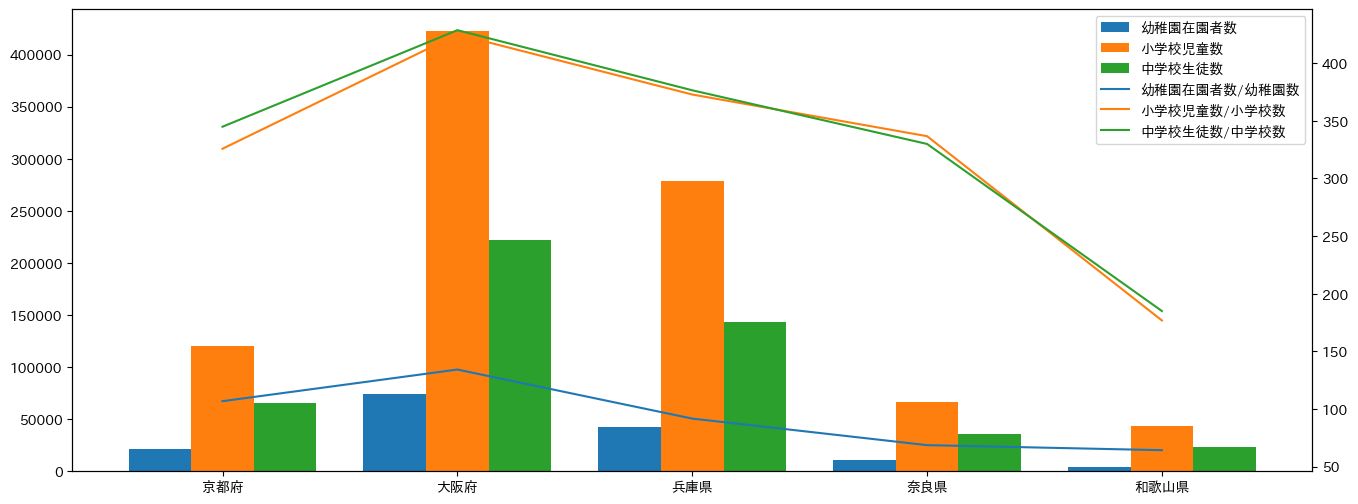

In [12]:
#10
from matplotlib import ticker
x = np.arange(len(idx))
ax.xaxis.set_major_locator(ticker.FixedLocator(x))
fig.set_size_inches(16,6)

cols2 = df02.columns.get_level_values(1)
width = 0.8 / len(cols2)

for i, bar in enumerate(bars):
    x = i % len(idx)
    offset = -0.4 + width * (i//len(idx))
    bar.set_x(x + offset)
    bar.set_width(width)
    if i % len(idx) == 0:
        bar.set_label(cols2[i // len(idx)])

h1, l1 = ax.get_legend_handles_labels()
h2, l2 = axt.get_legend_handles_labels()

ax.legend(h1+h2, l1+l2)

ax.figure